# Static - Interview Question Creation Based On Resume
> In this agent we will be implementing an AI which will look into resume and generate interview questions to evaluate candidate.

####  Step 1 - Ensure all environment variables are available and initialize LLM(s).

In [1]:
# Load Environment Variables

import os

from dotenv import load_dotenv
load_dotenv()

print('LOADED OPENAI_API_KEY :=',os.environ['OPENAI_API_KEY'] == os.getenv('OPENAI_API_KEY'))
print('LOADED LANGSMITH_API_KEY :=',os.environ['LANGSMITH_API_KEY'] == os.getenv('LANGSMITH_API_KEY'))
print('LOADED LANGSMITH_TRACING :=',os.environ['LANGSMITH_TRACING'] == os.getenv('LANGSMITH_TRACING'))

LOADED OPENAI_API_KEY := True
LOADED LANGSMITH_API_KEY := True
LOADED LANGSMITH_TRACING := True


In [2]:
# Create a LLM instance
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model_name="gpt-3.5-turbo")

####  Step 2 - Creating State in order to go ahead with workflow.

In [3]:
from typing import List
from typing_extensions import TypedDict, NotRequired, Literal, Annotated

import operator

# --- Leaf / child models ---
class ResumeAdditionalAward(TypedDict, total=False):
    title: NotRequired[str]

class ResumeCertification(TypedDict, total=False):
    certificate_name: NotRequired[str]
    certificate_link: NotRequired[str]
    issued_by: NotRequired[str]

class ResumeEducation(TypedDict, total=False):
    institution: NotRequired[str]
    location: NotRequired[str]
    degree_type: NotRequired[str]
    field_of_study: NotRequired[str]
    start_month_year: NotRequired[str]
    end_month_year: NotRequired[str]
    score_metric: NotRequired[str]
    score: NotRequired[str]

class ResumeExperience(TypedDict, total=False):
    employer: NotRequired[str]
    Job_title: NotRequired[str]
    location: NotRequired[str]
    start_month_year: NotRequired[str]
    end_month_year: NotRequired[str]

class ResumePersonalInfo(TypedDict, total=False):
    first_name: NotRequired[str]
    last_name: NotRequired[str]
    email: NotRequired[str]
    phone: NotRequired[str]
    address: NotRequired[str]
    dob: NotRequired[str]
    job_title: NotRequired[str]
    git_link: NotRequired[str]
    linkedin_profile: NotRequired[str]
    portfolio_link: NotRequired[str]

class ResumeProject(TypedDict, total=False):
    project_name: NotRequired[str]
    technologies_used: NotRequired[str]
    project_link: NotRequired[str]
    description: NotRequired[str]

class ResumeSkillSet(TypedDict, total=False):
    programming_languages: NotRequired[List[str]]
    libraries_and_frameworks: NotRequired[List[str]]
    tools_and_platforms: NotRequired[List[str]]
    databases: NotRequired[List[str]]
    concepts: NotRequired[List[str]]

class InterviewQuestion(TypedDict, total=False):
    id: str
    question_text: str
    difficulty_level: NotRequired[str]
    based_on: Literal['education', 'experience', 'skills', 'additional_awards', 'certifications', 'projects', 'personal_info', 'greet_and_small_talk']

# --- Root Resume model ---
class Resume(TypedDict, total=False):
    id: str
    profile_name: NotRequired[str]
    InterviewQuestion: Annotated[List[InterviewQuestion], operator.add]
    
    ResumeAdditionalAward: NotRequired[List[ResumeAdditionalAward]]
    ResumeCertification: NotRequired[List[ResumeCertification]]
    ResumeEducation: NotRequired[List[ResumeEducation]]
    ResumeExperience: NotRequired[List[ResumeExperience]]
    ResumePersonalInfo: ResumePersonalInfo
    ResumeProject: NotRequired[List[ResumeProject]]
    ResumeSkillSet: NotRequired[List[ResumeSkillSet]]

In [4]:
# Sample Data
sample_resume: Resume = {
    "id": "a1b2c3d4-e5f6-7890-abcd-ef1234567890",
    "profile_name": "Backend Developer Resume",

    "ResumeAdditionalAward": [
        {"title": "Best Software Engineer Award 2023"},
        {"title": "Top Contributor - Open Source"}
    ],

    "ResumeCertification": [
        {
            "certificate_name": "AWS Certified Solutions Architect",
            "certificate_link": "https://aws.amazon.com/certification/",
            "issued_by": "Amazon Web Services"
        },
        {
            "certificate_name": "Google Cloud Professional Developer",
            "certificate_link": "https://cloud.google.com/certification",
            "issued_by": "Google Cloud"
        }
    ],

    "ResumeEducation": [
        {
            "institution": "Indian Institute of Technology Bombay",
            "location": "Mumbai, India",
            "degree_type": "B.Tech",
            "field_of_study": "Computer Science",
            "start_month_year": "Aug 2017",
            "end_month_year": "May 2021",
            "score_metric": "CGPA",
            "score": "8.7"
        }
    ],

    "ResumeExperience": [
        {
            "employer": "Coditas",
            "Job_title": "Software Engineer",
            "location": "Pune, India",
            "start_month_year": "Jun 2021",
            "end_month_year": "Aug 2023"
        },
        {
            "employer": "Jash Datasciences",
            "Job_title": "Backend Developer",
            "location": "Remote",
            "start_month_year": "Sep 2023",
            "end_month_year": "Present"
        }
    ],

    "ResumePersonalInfo": {
            "first_name": "Suyash",
            "last_name": "Lawand",
            "email": "suyash@example.com",
            "phone": "+91-9876543210",
            "address": "Pune, Maharashtra, India",
            "dob": "1999-04-15",
            "job_title": "Backend Developer",
            "git_link": "https://github.com/suyashlawand",
            "linkedin_profile": "https://linkedin.com/in/suyashlawand",
            "portfolio_link": "https://suyashlawand.dev"
        },

    "ResumeProject": [
        {
            "project_name": "Menyokard",
            "technologies_used": "NestJS, PostgreSQL, Docker",
            "project_link": "https://menyokard.com",
            "description": "Real-time café management platform with QR-based ordering and billing."
        },
        {
            "project_name": "AI Resume Evaluator",
            "technologies_used": "Next.js, LangChain, Python",
            "project_link": "https://aireview.ai",
            "description": "An AI-driven resume analyzer with mock interview functionality."
        }
    ],

    "ResumeSkillSet": [
        {
            "programming_languages": ["Python", "Java", "TypeScript"],
            "libraries_and_frameworks": ["NestJS", "React", "Spring Boot"],
            "tools_and_platforms": ["Docker", "Kubernetes", "GitHub Actions"],
            "databases": ["PostgreSQL", "MySQL", "MongoDB"],
            "concepts": ["Microservices", "REST APIs", "Distributed Systems"]
        }
    ],

    "InterviewQuestion": []
}

####  Step 3 - Creating nodes in order to go ahead with workflow.

In [5]:
from uuid import uuid4
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
import json

from uuid import uuid4
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

from uuid import uuid4
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

def greet_and_small_talk(resume: Resume) -> Resume:
    pi = resume.get("ResumePersonalInfo", {})

    first_name = (pi.get("first_name") or "").strip()
    last_name = (pi.get("last_name") or "").strip()
    job_title = (pi.get("job_title") or resume.get("profile_name") or "the role").strip()
    profile_name = (resume.get("profile_name") or "").strip()
    current_location = (pi.get("address") or "").strip()
    education_list = resume.get("ResumeEducation", [])

    highest_education = ""
    if education_list:
        highest_education = education_list[0].get("degree", "")

    # 1. Greeting Question
    greeting_prompt = PromptTemplate(
        input_variables=["first_name", "last_name", "job_title", "profile_name", "current_location"],
        template="""
You are a friendly AI interviewer.

Start the conversation by greeting the candidate warmly.
Mention their name, current location (if provided), and show enthusiasm for the upcoming interview.

Keep it short (2-3 sentences), professional, and friendly.
""".strip()
    )

    # 2. Education Question
    education_prompt = PromptTemplate(
        input_variables=["highest_education"],
        template="""
You are an interviewer.

Ask a question about the candidate's educational background based on the following degree:
- Degree: {highest_education}

Keep it conversational and friendly. Do not ask technical or factual questions.
""".strip()
    )

    # 3. Self-introduction Question
    intro_prompt = PromptTemplate(
        input_variables=[],
        template="""
You are an interviewer.

Ask the candidate to briefly introduce themselves and talk about their professional background. Ask what was the most challenging problem they've worked on and how they overcame it.

Keep it simple and open-ended.
""".strip()
    )

    chain_1 = greeting_prompt | llm | StrOutputParser()
    chain_2 = education_prompt | llm | StrOutputParser()
    chain_3 = intro_prompt | llm | StrOutputParser()

    result_1 = chain_1.invoke({
        "first_name": first_name,
        "last_name": last_name,
        "job_title": job_title,
        "profile_name": profile_name,
        "current_location": current_location,
    })

    result_2 = chain_2.invoke({
        "highest_education": highest_education
    })

    result_3 = chain_3.invoke({})

    for idx, question_text in enumerate([result_1, result_2, result_3]):
        question: InterviewQuestion = {
            "id": str(uuid4()),
            "question_text": question_text.strip(),
            "difficulty_level": "easy",
            "based_on": ["greeting", "education", "introduction"][idx]
        }
        resume.setdefault("InterviewQuestion", []).append(question)

    return resume



def generate_base_question(resume: Resume) -> Resume:
    skills = resume.get("ResumeSkillSet", [])
    
    if not skills:
        return resume

    for skill_set in skills:
        for category, skill_items in skill_set.items():
            if not skill_items:
                continue

            for skill in skill_items:
                for _ in range(1):
                    prompt = PromptTemplate(
                        input_variables=["skill", "category"],
                        template="""
You are a technical interviewer.

Your task is to generate a **problem-solving oriented** technical question that effectively evaluates the candidate's **practical understanding** of the following:

- Skill: {skill}
- Category: {category}

Guidelines:
- Ask **real-world, scenario-based** or **application-driven** questions that test problem-solving
- Keep the question **short, clear, and specific**
- Avoid behavioral, opinion-based, or HR-style questions
- Ensure the question **requires the candidate to think** or **apply knowledge**, not just recall facts
""".strip()
                    )

                    chain = prompt | llm | StrOutputParser()
                    result = chain.invoke({
                        "skill": skill,
                        "category": category.replace('_', ' ').title(),
                    })

                    question_text = result

                    question: InterviewQuestion = {
                        "id": str(uuid4()),
                        "question_text": question_text,
                        "difficulty_level": "medium",
                        "based_on": f"{category}:{skill}",
                    }

                    resume.setdefault("InterviewQuestion", []).append(question)
    
    return resume

def shortlist_questions(resume: Resume) -> Resume:
    questions_to_shortlist = resume.get("InterviewQuestion", [])
    
    if not questions_to_shortlist:
        return resume

    all_questions_text = "\n".join(
        f"- {q['question_text']}" for q in questions_to_shortlist
    )

    prompt = PromptTemplate(
        input_variables=["questions"],
        template="""
You are a technical interviewer reviewing a list of generated interview questions.

Here are the candidate's interview questions:

{questions}

**Task:**
- Review the list and select **only the most relevant and distinct questions**.
- Remove any:
  - Redundant or duplicate questions
  - Vague, overly simple, or off-topic questions
- Keep around **5 to 7 high-quality questions** that test **different important skills**.

**Output:**  
Return only the shortlisted question texts in a clear list format.
""".strip()
    )

    chain = prompt | llm | StrOutputParser()
    result = chain.invoke({"questions": all_questions_text})

    # Parse the returned list
    shortlisted_texts = [q.strip("-• ").strip() for q in result.strip().split("\n") if q.strip()]

    # Filter original questions to keep only shortlisted
    shortlisted = []
    seen = set()
    for q in questions_to_shortlist:
        if any(q["question_text"].strip() == s for s in shortlisted_texts) and q["question_text"] not in seen:
            shortlisted.append(q)
            seen.add(q["question_text"])

    resume["InterviewQuestion"] = shortlisted
    return resume

####  Step 4 - Creating graph!

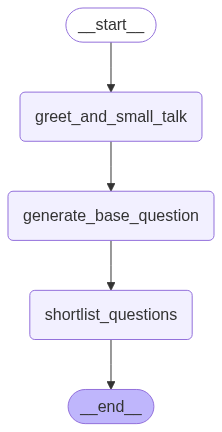

In [6]:
from langgraph.graph import START, END, StateGraph

graph = StateGraph(Resume)

# Add Nodes
graph.add_node('greet_and_small_talk', greet_and_small_talk)
graph.add_node('generate_base_question', generate_base_question)
graph.add_node('shortlist_questions', shortlist_questions)

# Add Edges
graph.add_edge(START, 'greet_and_small_talk')
graph.add_edge('greet_and_small_talk', 'generate_base_question')
graph.add_edge('generate_base_question', 'shortlist_questions')
graph.add_edge('shortlist_questions', END)

graph_builder = graph.compile()
graph_builder.validate()

In [7]:
generated_resume_with_questions = graph_builder.invoke(sample_resume)

print("AI Generated {} Questions".format(len(generated_resume_with_questions['InterviewQuestion'])))

AI Generated 42 Questions
